Major Downtime 23-24 October
============================


In [1]:
# Import and Init the main tools
# If for some reason you do not want to cache your data you can pass 
# 'cache_data=False' to the CachedDataLoader constructor.  

from lib.cached_data_loader import CachedDataLoader
from lib.panda_plotter import PandaPlotter
cdl = CachedDataLoader()
pp = PandaPlotter()


In [2]:
# Get hold of the dataframe 
sql = 'SELECT * FROM v__wcb__h__record_counts'
df = cdl.get_dataframe(sql)
df = cdl.reindex_by_timestamp(df, "ts", "1H")
# df.describe()

In [3]:
# Filter a specific time period by mask
mask = (df['ts'] >= '2019-10-21 00:00:00') & (df['ts'] <= '2019-10-26 00:00:00')
mdf = df.loc[mask]
# mdf.describe()


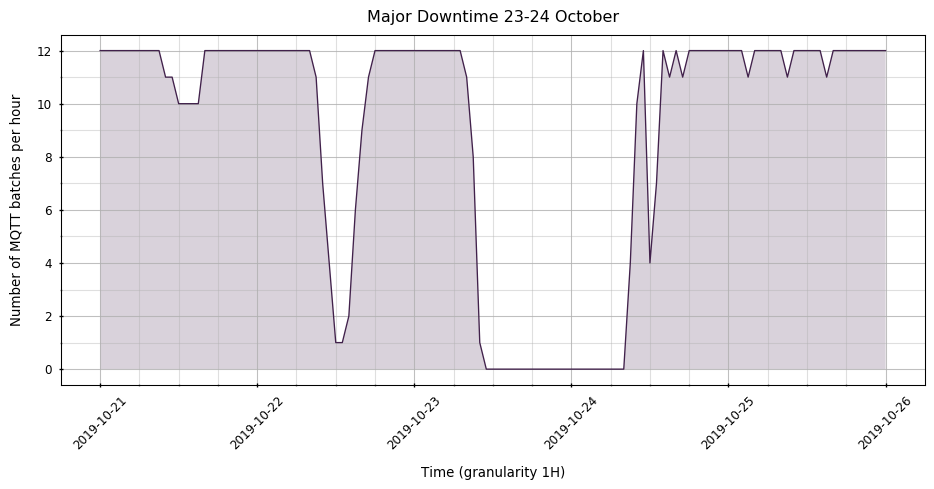

In [4]:
plotconfig = {
    "title": "Major Downtime 23-24 October",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["mqtt_count"],
            "x_label": "Time (granularity 1H)",
            "y_label": "Number of MQTT batches per hour",
            "x_major_ticks_freq": 24,
            "x_minor_ticks_freq": 6,
            "y_major_ticks_freq": 2,
            "y_minor_ticks_freq": 1,
        }
    ],
    "style": {
        "palette_color": "purple",
        "x_axis_value_rotation": 45,
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)